<a href="https://colab.research.google.com/github/Bertha-ding/20MA573-yuning-ding/blob/master/hw/hw4-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Volatility calibration to BSM

## Abstract

- Goal
    - Calibrate BSM model for makert price of options


## Problem

All of pricing models require a set of model parameters in order to fully define the dynamics of each model. The process of adjusting model parameters such that the model prices are compatible with market prices is called **Calibration**. 

Input:

- market prices of several options with different strikes and maturities
- spot price
- interest rates

Output:

- Find volatility of BSM model

## Anal


Suppose
- Model prameter $\theta = (\theta_1, ... \theta_m)$ is a vector
- Prices of $n$ instruments are aviable in the market with its market price of $i$th instrument quoted by $C_i$. 
Let's denote $C = (C_1, ..., C_n)$ as a market price vector.
- In theory, $C_i^\theta$ is the model price of the $i$th instrument, and they are denoted as a vector $C^\theta = (C_1^\theta, ...,  C^\theta_n)$. 

Given a distance function $H: \mathbb R^n \times \mathbb R^n \mapsto \mathbb R^+$, calibration is to find the parameter $\theta^*$  which minimize the objective function $H(C^\theta, C)$, i.e.
$$ \theta^* = \arg\min_\theta H(C^\theta, C).$$

Commonly used distance functions for $H$ are 
- $H(x, y) = (\sum_{i=1}^n w_i |x_i - y_i|^p)^{1/p}.$
- $H(x, y) = (\sum_{i=1}^n w_i | \frac{x_i - y_i}{y_i}|^p)^{1/p}.$ If $p = 2$, $w_i =1$, then $H^2$ is called as SSRE (sum of squred relative errors)
- $H(x, y) = (\sum_{i=1}^n w_i |\ln x - \ln y|^p)^{1/p}.$

In this below, we are goint to use, the first case of $H$ with $p = 2$ and $w_i = 1$ for all i's.

# Hw Tasks

## Task-1

- Upload data from [here](https://github.com/songqsh/20s_ma573/blob/master/src/20optiondata2.dat) to your cloud platform
- Calibration/Performance:
  - Filter out 2-mon options and calibrate volatility using the distance function
$$H(x, y) = (\sum_{i=1}^n w_i |x_i - y_i|^2)^{1/2}.$$
  - Calibrated price for option means the computed option price using calibrated volatility and other parameters given by the market. Compare the market price and calibrated price using a plot of two curves: strike vs market (calibrated) price
- Do the same thing for the filter from 5-mon options.
- Which calibrated volatility is bigger, 2-mon or 5-mon?


Import package from Github and check files

In [66]:
%cd~

!git clone https://github.com/Bertha-ding/20MA573-yuning-ding.git 
pass

%cd 20MA573-yuning-ding/src/
%ls

/root
fatal: destination path '20MA573-yuning-ding' already exists and is not an empty directory.
/root/20MA573-yuning-ding/src
20optiondata2.dat  hw1_random_walk.ipynb  prj02.ipynb  __pycache__/
bsm.py             prj01.ipynb            prj03.ipynb  Untitled0.ipynb


import module and read data

In [67]:
from bsm import *
import scipy.optimize as so
import numpy as np
import scipy.stats as ss

#Read four-column data
#columns are otype, maturity, strike, option_price
np_option_data1 = np.loadtxt('20optiondata2.dat', comments='#', delimiter=',')

print('>>>otype,>>>>>>> maturity, >>strike, >>>>>>option_price')
print(np_option_data1)

>>>otype,>>>>>>> maturity, >>strike, >>>>>>option_price
[[  1.           0.16666667  97.           5.32705461]
 [  1.           0.16666667  99.           3.86224255]
 [  1.           0.16666667 101.           2.7204371 ]
 [  1.           0.16666667 103.           2.1202793 ]
 [  1.           0.41666667  97.           7.23756307]
 [  1.           0.41666667  99.           5.95053461]
 [  1.           0.41666667 101.           5.2640122 ]
 [  1.           0.41666667 103.           4.97493422]]


define for assets

In [0]:
gbm1 = Gbm(
    init_state = 100., 
    drift_ratio = .04,
    vol_ratio = .2)

In [0]:
'''================
define an error function
===================='''
def error_function(vol, gbm, option_list):
  gbm.vol_ratio = vol
  err = 0
  for i in range(len(option_list)):
    err = (err + abs((option_list[i]).market_price - gbm.bsm_price(option_list[i]))**2)   
  return err

  
'''==========
define a method to seek for an calibrate volatility
============'''

def implied_volatility(gbm, option_list):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, args = (gbm, option_list), disp = 0)[0]


In [95]:
filter1 = np_option_data2[np_option_data2[:,1] == 2/12]
num_row = filter1.shape[0]
option_list = []

for i in range(num_row):
  option1 = VanillaOption(
      otype = filter1[i,0],
      strike = filter1[i,2],
      maturity = filter1[i,1],
      market_price = filter1[i,3]
  )   
  option_list.append(option1)
  calibrated_volatility = implied_volatility(gbm1, option_list)
print('The calibrated volatility for 2-mon is' ,calibrated_volatility)

The calibrated volatility for 2-mon is 0.18671875000000032


In [96]:
gbm1.vol_ratio = calibrated_volatility
calibrated_price = []
for i in range(len(option_list)):
  model_price1 = gbm1.bsm_price(option_list[i]) 
  calibrated_price.append(model_price1)
print (calibrated_price)

[5.154129043669769, 3.916185018579526, 2.8836760601712115, 2.0552774238826856]


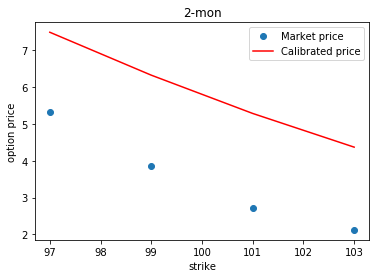

In [99]:
import matplotlib.pyplot as plt
from pylab import plt

x= [option_list[i].strike for i in range(len(option_list))]
y = [option_list[i].market_price for i in range(len(option_list))]
plt.plot(x, y, 'o', label='Market price')

y = calibrated_price1
plt.plot(x, y, 'r', label = 'Calibrated price')

plt.ylabel('option price')
plt.xlabel('strike')
plt.title('2-mon')
plt.legend();

In [86]:
filter2 = np_option_data2[np_option_data2[:,1] == 5/12]
num_row = filter2.shape[0]
option_list1 = []

for i in range(num_row):
  option2 = VanillaOption(
      otype = filter2[i,0],
      strike = filter2[i,2],
      maturity = filter2[i,1],
      market_price = filter2[i,3]
  )   
  option_list1.append(option2)
  calibrated_volatility1 = implied_volatility(gbm1, option_list1)
print('The calibrated volatility for 5-mon is' ,calibrated_volatility1)

The calibrated volatility for 5-mon is 0.19265625000000033


In [87]:
gbm1.vol_ratio = calibrated_volatility1
calibrated_price1 = []
for i in range(len(option_list1)):
  model_price2 = gbm1.bsm_price(option_list1[i]) 
  calibrated_price1.append(model_price2)
print (calibrated_price1)

[7.488707764749314, 6.323147827044977, 5.283307299377867, 4.368157183386991]


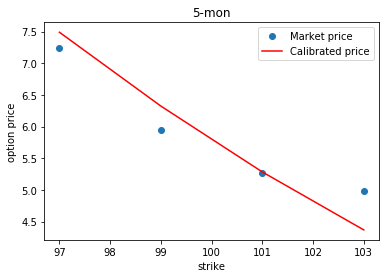

In [92]:
x1= [option_list1[i].strike for i in range(len(option_list1))]
y1 = [option_list1[i].market_price for i in range(len(option_list1))]
plt.plot(x1, y1, 'o', label='Market price')

y2 = calibrated_price1
plt.plot(x1, y2, 'r', label = 'Calibrated price')

plt.ylabel('option price')
plt.xlabel('strike')
plt.title('5-mon')
plt.legend();

The volatility of 2-mon is higher than volatility of 5-mon.

## Task-2 (optional)
Please discuss the validity of the following statements:
- Given an underlying asset, options with shorter maturity can be better fitted than a longer maturity.
- Suppose Assest1(ex. AAPL) is more liquid than Asset2 (ex. TAL). Then Asset1 can be fit better than Asset2.